In [4]:
import torch 
from Gridworld import Gridworld
import numpy as np
import torch
from Gridworld import Gridworld
from IPython.display import clear_output
import random
from matplotlib import pylab as plt
game = Gridworld(size=4, mode='static')

In [5]:
l1 = 64
l2 = 150
l3 = 100
l4 = 4

model = torch.nn.Sequential(
    torch.nn.Linear(l1, l2),
    torch.nn.ReLU(),
    torch.nn.Linear(l2, l3),
    torch.nn.ReLU(),
    torch.nn.Linear(l3,l4)
)
loss_fn = torch.nn.MSELoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

gamma = 0.9
epsilon = 0.3

In [8]:
from collections import deque
epochs = 5000
losses = []
mem_size = 1000 #A
batch_size = 200 #B
replay = deque(maxlen=mem_size) #C
max_moves = 50 #D
h = 0
action_set = {
    0: 'u',
    1: 'd',
    2: 'l',
    3: 'r',
}

for i in range(epochs):
    game = Gridworld(size=4, mode='random')
    state1_ = game.board.render_np().reshape(1,64) + np.random.rand(1,64)/100.0
    state1 = torch.from_numpy(state1_).float()
    status = 1
    mov = 0
    while(status == 1): 
        mov += 1
        qval = model(state1) #E
        qval_ = qval.data.numpy()
        if (random.random() < epsilon): #F
            action_ = np.random.randint(0,4)
        else:
            action_ = np.argmax(qval_)
        
        action = action_set[action_]
        game.makeMove(action)
        state2_ = game.board.render_np().reshape(1,64) + np.random.rand(1,64)/100.0
        state2 = torch.from_numpy(state2_).float()
        reward = game.reward()
        done = True if reward > 0 else False
        exp =  (state1, action_, reward, state2, done) #G
        replay.append(exp) #H
        state1 = state2
        
        if len(replay) > batch_size: #I
            minibatch = random.sample(replay, batch_size) #J
            state1_batch = torch.cat([s1 for (s1,a,r,s2,d) in minibatch]) #K
            action_batch = torch.Tensor([a for (s1,a,r,s2,d) in minibatch])
            reward_batch = torch.Tensor([r for (s1,a,r,s2,d) in minibatch])
            state2_batch = torch.cat([s2 for (s1,a,r,s2,d) in minibatch])
            done_batch = torch.Tensor([d for (s1,a,r,s2,d) in minibatch])
            
            print(state2_batch.shape)
            Q1 = model(state1_batch) #L
            with torch.no_grad():
                Q2 = model(state2_batch) #M
            
            Y = reward_batch + gamma * ((1 - done_batch) * torch.max(Q2,dim=1)[0]) #N
            X = Q1.gather(dim=1,index=action_batch.long().unsqueeze(dim=1)).squeeze()
            loss = loss_fn(X, Y.detach())
            print(i, loss.item())
            clear_output(wait=True)
            optimizer.zero_grad()
            loss.backward()
            losses.append(loss.item())
            optimizer.step()

        if reward != -1 or mov > max_moves: #O
            status = 0
            mov = 0

torch.Size([200, 64])
4999 0.05631287023425102


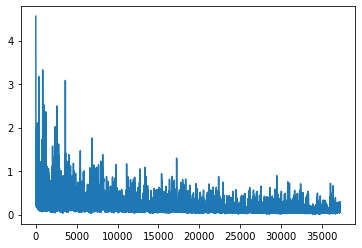

In [10]:
plt.plot(losses)

In [ ]:
# set hyperparameters, epochs, discount factor, epsilon, memory size and batch size 
# run for number of epochs 
# initialize new game and get the state 
# Play while havent lost or won up till a certain maximum number of moves 
# get predicted Q values and use epsilon to determine randomness 
# make the move and get the reward for the new state 
# check if the replay actions have exceeded the batch size 
# if exceeded, sample a minibatch 
# recompute the q1 value for the mini batch to get gradients 
# recompute the q2 values without gradient 
# calculate the reward which is current reward + predicted reward if game won, then future state is none 
# ground truth is the current maximum reward for the current action 
# back propagate the loss 
# step the optimizer
# if the game has ended go to new epoch 


In [14]:
l1 = 64 
l2 = 150 
l3 = 100 
l4 = 4

model = torch.nn.Sequential([
    torch.nn.Flatten(0,2), # flatten the 2d game state to a 1d vector
    torch.nn.Linear(l1,l2),  
    torch.nn.ReLU(), 
    torch.nn.Linear(l2,l3), 
    torch.nn.ReLU(), 
    torch.nn.Linear(l3,l4)
])

optimizer = torch.nn
loss_fn = torch.nn.MSELoss()
gamma = 0.1
epsilon = 1.0 

In [3]:
a = torch.randn(4,4)
a

tensor([[ 0.0408,  0.0548, -1.8487,  0.6849],
        [ 1.2505,  0.4845,  1.6063, -0.5111],
        [ 1.1303, -0.2714, -0.6895, -2.5753],
        [-0.3682, -0.7046,  0.8661, -0.8692]])

In [8]:
torch.max(a, dim=1)[0]

tensor([0.6849, 1.6063, 1.1303, 0.8661])

In [10]:
action = torch.max(a, dim=1)[1]
action

tensor([3, 2, 0, 2])

In [11]:
a.gather(dim=1, index=action.long().unsqueeze(dim=1)).squeeze()

tensor([0.6849, 1.6063, 1.1303, 0.8661])

In [13]:
action.long().unsqueeze(dim=1)

tensor([[3],
        [2],
        [0],
        [2]])